## Install libraries

In [1]:
# !pip install --upgrade fastaudio fastai fastcore

In [2]:
import torch, torchvision, torchaudio, fastai, fastcore, fastaudio
print(f'torch: {torch.__version__}')
print(f'torchvision: {torchvision.__version__}')
print(f'torchaudio: {torchaudio.__version__}')
print(f'fastai: {fastai.__version__}')
print(f'fastcore: {fastcore.__version__}')
print(f'fastaudio: {fastaudio.__version__}')

torch: 1.8.1+cu102
torchvision: 0.9.1+cu102
torchaudio: 0.8.1
fastai: 2.4
fastcore: 1.3.20
fastaudio: 1.0.2


/opt/conda/envs/fastai/lib/python3.8/site-packages/torchaudio/backend/utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


## Define helper functions

In [3]:
def audio_learner(dls, arch, loss_func, opt_func, metrics):
    "Prepares a `Learner` for audio processing"
    learn = Learner(dls, arch, loss_func, opt_func, metrics=metrics)
    channels = dls.one_batch()[0].shape[1]
    learn.model[0][0].in_channels = channels
    learn.model[0][0].weight = torch.nn.parameter.Parameter(learn.model[0][0].weight[:,1,:,:].unsqueeze(1))
    return learn

## Download the dataset

In [4]:
# from fastai.basics import *
# from gdown import download

In [5]:
# url_train = 'https://drive.google.com/uc?id=1D_l-OJl35XAxbFa9uzg8bA8GbANEYN0l'
# url_test = 'https://drive.google.com/uc?id=1TfjMe1_JJC9iaUCIjCYFpvDomt_xenfN'
# download(url_train, 'train.zip', quiet=True)
# download(url_test, 'test.zip', quiet=True)
# file_extract('train.zip')
# file_extract('test.zip')

## External dataset

- Free Spoken Digit Dataset (FSDD): https://github.com/Jakobovski/free-spoken-digit-dataset
- Move all of them into the competition data folder

In [6]:
# from fastai.vision.all import *
# from fastaudio.all import *

In [7]:
# url = 'https://github.com/Jakobovski/free-spoken-digit-dataset/archive/master.zip'
# download_data(url, 'digit.zip')
# file_extract('digit.zip')

In [8]:
# fnames = get_audio_files('free-spoken-digit-dataset-master/recordings').sorted()

In [9]:
# i2s = {
#     '0': 'zero',
#     '1': 'one',
#     '2': 'two',
#     '3': 'three',
#     '4': 'four',
#     '5': 'five',
#     '6': 'six',
#     '7': 'seven',
#     '8': 'eight',
#     '9': 'nine',
# }

In [10]:
# for fname in fnames:
#     loc = 'challenge_4_training_dataset/s2_train_release/' + i2s[fname.name[0]] + '/' + fname.name
#     path_name = Path(fname)
#     path_name.rename(loc)

In [11]:
# clean up
# !rm -rf 'free-spoken-digit-dataset-master'

- SpeechCommands dataset: https://pytorch.org/audio/stable/_modules/torchaudio/datasets/speechcommands.html
- Move all of them into the competition data folder

In [12]:
# from fastai.vision.all import *
# from fastaudio.all import *

In [13]:
# !pwd

In [14]:
# import torchaudio
# r = torchaudio.datasets.SPEECHCOMMANDS('/notebooks/Kaggle/TIL_2021/C4', download=True)

In [15]:
# Classes that we can have from this dataset
# lbls = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'bird', 'cat', 'dog', 'up', 'down', 'left', 'right', 'go', 'stop']

In [16]:
# path = Path('SpeechCommands/speech_commands_v0.02')
# path.ls()

In [17]:
# for lbl in lbls:
#     fnames = get_audio_files(path/lbl)
#     for fname in fnames:
#         loc = 'challenge_4_training_dataset/s2_train_release/' + lbl + '/' + fname.name
#         print(loc)
#         path_name = Path(fname)
#         path_name.rename(loc)

In [18]:
# clean up
# !rm -rf 'SpeechCommands'

- Data from competition s2

In [19]:
# from fastai.basics import *
# from gdown import download

In [20]:
# Classes that we can have from this dataset
# lbls = ['falcon', 'snake']

In [ ]:
# url_train_s2 = 'https://drive.google.com/uc?id=1W8wyny41Sg-UTCYesI5UZR5kea7z26kQ'
# download(url_train_s2, 'train_s2.zip', quiet=True)
# file_extract('train_s2.zip')

In [21]:
# path = Path('s1_release')
# path.ls()

In [22]:
# for lbl in lbls:
#     fnames = get_audio_files(path/lbl)
#     for fname in fnames:
#         loc = 'challenge_4_training_dataset/s2_train_release/' + lbl + '/' + fname.name
#         print(loc)
#         path_name = Path(fname)
#         path_name.rename(loc)

In [ ]:
# url_hidden = 'https://drive.google.com/uc?id=1UjmCtdOSP-HGPVlMKCLRzTkIQJ65CIcs'
# download(url_hidden, 'hidden.zip', quiet=True)
# file_extract('hidden.zip')

In [ ]:
# path = Path('s1_hidden')
# path.ls()

In [ ]:
# for lbl in lbls:
#     fnames = get_audio_files(path/lbl)
#     for fname in fnames:
#         loc = 'challenge_4_training_dataset/s2_train_release/' + lbl + '/' + fname.name
#         print(loc)
#         path_name = Path(fname)
#         path_name.rename(loc)

## Data Processing

In [23]:
from fastai.vision.all import *
from fastaudio.all import *

SEED = 42
set_seed(SEED, reproducible=True)

In [24]:
path = Path('challenge_4_training_dataset/s2_train_release')
path.ls()

(#22) [Path('challenge_4_training_dataset/s2_train_release/one'),Path('challenge_4_training_dataset/s2_train_release/down'),Path('challenge_4_training_dataset/s2_train_release/dog'),Path('challenge_4_training_dataset/s2_train_release/three'),Path('challenge_4_training_dataset/s2_train_release/up'),Path('challenge_4_training_dataset/s2_train_release/stop'),Path('challenge_4_training_dataset/s2_train_release/seven'),Path('challenge_4_training_dataset/s2_train_release/left'),Path('challenge_4_training_dataset/s2_train_release/eight'),Path('challenge_4_training_dataset/s2_train_release/two')...]

In [25]:
for sub in path.ls():
    print(f'{sub.name}: {len(sub.ls())}')

one: 4240
down: 4217
dog: 2428
three: 4077
up: 4023
stop: 4172
seven: 4348
left: 4101
eight: 4137
two: 4230
right: 4078
chicken: 300
nine: 4284
zero: 4402
cat: 2331
snake: 300
four: 4078
bird: 2114
go: 4180
five: 4402
falcon: 300
six: 4210


In [26]:
cfg = AudioConfig.Voice() 
a2s = AudioToSpec.from_cfg(cfg)

item_tfms = [RemoveSilence(), ResizeSignal(1000), a2s, MaskTime(num_masks=2, size=4), MaskFreq(num_masks=2, size=10)]
batch_tfms = [SignalShifter(), ChangeVolume(), SignalCutout()]

bs = 64

In [27]:
db = DataBlock(
    blocks=(AudioBlock, CategoryBlock),
    splitter=RandomSplitter(seed=SEED),
    get_items=get_audio_files,
    get_y=parent_label,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms,
)
# db.summary(path)

/opt/conda/envs/fastai/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/envs/fastai/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


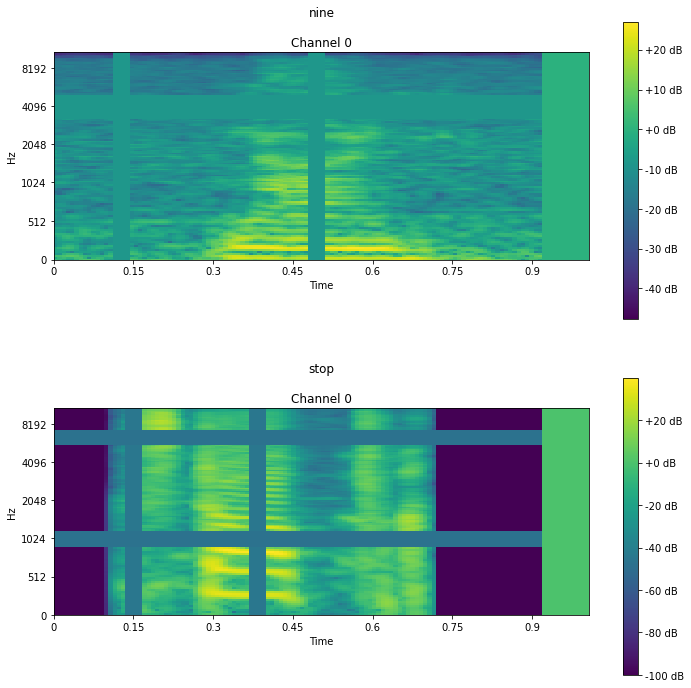

In [28]:
dls = db.dataloaders(path, bs=bs)
dls.show_batch(figsize=(12, 12))

## Model training

In [29]:
model_name = 'resnet50'

- Repeat this steps to train 5 different models

In [30]:
learn = cnn_learner(dls, resnet50, n_in=1, opt_func=ranger, metrics=accuracy)
# learn = cnn_learner(dls, densenet169, n_in=1, opt_func=ranger, metrics=accuracy)
# learn = cnn_learner(dls, vgg19_bn, n_in=1, opt_func=ranger, metrics=accuracy)
# learn = audio_learner(dls, xresnext50(n_out=dls.c), loss_func=CrossEntropyLossFlat(), opt_func=ranger, metrics=accuracy)
# learn = audio_learner(dls, xse_resnext50_deeper(n_out=dls.c), loss_func=CrossEntropyLossFlat(), opt_func=ranger, metrics=accuracy)

In [31]:
learn.unfreeze()
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 63   
Conv2d                                    3136       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 32 x 32  
Conv2d                                    16384      True      
BatchNorm2d                               512        True      
ReLU                                                           
__________________________________________

SuggestedLRs(valley=tensor(0.0063))

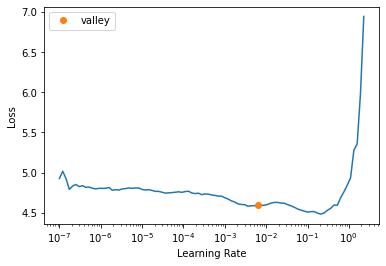

In [32]:
learn.lr_find()

In [33]:
cbs = [SaveModelCallback(monitor='accuracy', fname=model_name+'-best')]

In [ ]:
learn.fit_flat_cos(25, 6e-3, cbs=cbs) # use the LR suggested above

epoch,train_loss,valid_loss,accuracy,time
0,0.600168,0.459530,0.860955,04:21
1,0.379927,0.448477,0.864425,04:22
2,0.297686,0.235908,0.929544,04:22
3,0.263775,0.233821,0.925807,04:21
4,0.249560,0.211612,0.933547,04:21


Better model found at epoch 0 with accuracy value: 0.8609554171562195.
Better model found at epoch 1 with accuracy value: 0.8644248843193054.
Better model found at epoch 2 with accuracy value: 0.9295436143875122.
Better model found at epoch 4 with accuracy value: 0.9335468411445618.


In [ ]:
learn.recorder.plot_loss() 

In [ ]:
learn.load(model_name+'-best')

In [ ]:
learn.validate()

In [ ]:
learn.export(model_name+'.pkl')

## Evaluation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12))

In [ ]:
interp.most_confused(min_val=2)

## Ensemble

In [ ]:
# model_names = ['resnet18', 'densenet121', 'vgg19', 'xresnext18', 'xse_resnext18_deeper']
model_names = ['resnet34']

In [ ]:
all_val_preds = []

In [ ]:
for model_name in model_names:
    learn = load_learner(model_name+'.pkl')
    learn.dls = dls
    preds, targs = learn.tta(n=10)
    all_val_preds.append(preds)
    score = accuracy(preds, targs).item()
    print(f'{model_name}: {score:.5f}')

In [ ]:
def combinations(a):
    if len(a) == 0:
        return [[]]
    cs = []
    for c in combinations(a[1:]):
        cs += [c, c+[a[0]]]
    return cs

tmp = list(combinations(range(5)))

In [ ]:
# import copy

# for combi in tmp:
#     if len(combi) > 0:
#         avg_preds = copy.deepcopy(all_val_preds[combi[0]])
#         for i in combi[1:]:
#             avg_preds += all_val_preds[i]
#         avg_preds /= len(combi)
        
#         nxt_score = accuracy(avg_preds, targs).item()
#         print(f'{[model_names[i] for i in combi]}: {nxt_score:.5f}')

## Test data

In [ ]:
from fastai.vision.all import *
from fastaudio.all import *

SEED = 42
set_seed(SEED, reproducible=True)

In [ ]:
test_path = Path('challenge_4_test_dataset')

In [ ]:
test_fnames = get_audio_files(test_path).sorted()

In [ ]:
submit_df = pd.read_csv('challenge_4_sample_submission.csv', names=['file', 'label'])

In [ ]:
# model_names = ['resnet18', 'densenet121', 'vgg19', 'xresnext18', 'xse_resnext18_deeper']
model_names = ['resnet34']
all_val_preds, all_test_preds = [], []

for model_name in model_names:
    learn = load_learner(model_name+'.pkl')
    test_dl = learn.dls.test_dl(test_fnames)
    preds, _ = learn.tta(dl=test_dl, n=10)
    all_test_preds.append(preds)

- Choose the best ensemble combinations based on the validation score
- The best combination may be different each time due to randomness in TTA
- If unsure, just take an equal average of all 5 like this

In [ ]:
# avg_test_preds = (all_test_preds[0] + all_test_preds[1] + all_test_preds[2] + all_test_preds[3] + all_test_preds[4]) / 5
avg_test_preds = (all_test_preds[0]) / 1

In [ ]:
preds = [pred.argmax() for pred in avg_test_preds]

In [ ]:
submit_df['label'] = learn.dls.vocab[preds]
submit_df.head()

## Submission

In [ ]:
submit_df.to_csv('submission_cs.csv', index=False, header=False)

In [ ]:
!python speech_submission_checker.py 'submission_cs.csv' 'challenge_4_sample_submission.csv'

## End